In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [257]:
sns.set(font_scale=1.1)
cp = sns.color_palette()
warnings.filterwarnings("ignore")  # Ignore divide by zero numpy warnings

from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
# pd.set_option('display.width', 1000)

In [48]:
def load_results(experiment_name):
    prefix = './../../data/experiment_output/repeat_loan/results'
    filename = f"{prefix}/{experiment_name}.csv"
    results = pd.read_csv(filename)
    return results

In [246]:
EXPERIMENT_NAME = 'max_steps_per_episode_4'
results = load_results(EXPERIMENT_NAME)
results

,Algo,R^C/ep,R^Q/ep,R^F/ep,R^C/ep std,R^Q/ep std,R^F/ep std,R^C/ep p05,R^Q/ep p05,R^F/ep p05,R^C/ep p95,R^Q/ep p95,R^F/ep p95,Y0 AVG,Y1 AVG,Y0 AVG p05,Y1 AVG p05,Y0 AVG p95,Y1 AVG p95,Y0 std,Y1 std,Y0 FINAL,Y1 FINAL,Y0 FINAL std,Y1 FINAL std,Y0 FINAL p05,Y1 FINAL p05,Y0 FINAL p95,Y1 FINAL p95,|Y1-Y0| AVG,|Y1-Y0| std,|Y1-Y0| AVG p05,|Y1-Y0| AVG p95,|Y1-Y0| FINAL,|Y1-Y0| FINAL std,|Y1-Y0| FINAL p05,|Y1-Y0| FINAL p95
0,Man,1.21,1.18,0.88,1.09,0.88,0.66,0.0,0.0,0.0,3.0,3.0,1.51,0.63,1.01,0.0,0.0,2.0,2.0,0.84,0.90,0.47,1.03,0.76,0.89,0.0,0.0,2.0,2.0,0.97,0.84,0.0,2.0,0.89,0.85,0.0,2.0
1,100,2.39,1.34,0.90,0.80,0.87,0.60,1.0,0.0,0.0,3.0,3.0,1.75,0.76,1.06,0.0,0.0,2.0,2.0,0.83,0.87,0.62,1.10,0.76,0.86,0.0,0.0,2.0,2.0,0.94,0.79,0.0,2.0,0.91,0.77,0.0,2.0
2,110,2.35,1.35,0.84,0.83,0.84,0.62,1.0,0.0,0.0,3.0,3.0,1.75,0.73,1.10,0.0,0.0,2.0,2.0,0.84,0.87,0.58,1.15,0.77,0.85,0.0,0.0,2.0,2.0,1.02,0.80,0.0,2.0,0.98,0.79,0.0,2.0
3,111,2.33,1.29,0.90,0.84,0.85,0.60,1.0,0.0,0.0,3.0,3.0,1.75,0.72,1.04,0.0,0.0,2.0,2.0,0.81,0.87,0.56,1.09,0.72,0.86,0.0,0.0,2.0,2.0,0.95,0.79,0.0,2.0,0.89,0.77,0.0,2.0
4,121,1.97,1.56,0.96,1.05,0.82,0.49,0.0,0.0,0.0,3.0,3.0,1.50,1.01,1.08,0.0,0.0,2.0,2.0,0.69,0.86,0.94,1.13,0.64,0.86,0.0,0.0,2.0,2.0,0.86,0.67,0.0,2.0,0.79,0.61,0.0,2.0


In [255]:
def plot_results(results, subtitles=['(a)', '(b)'], title=None):
    fig, axes = plt.subplots(1, 2, figsize=(11, 4))
    results = results.copy()
    
    ##
    # Y0 vs Y1
    ##
    ax1 = axes[0]
    # Plot point estimate (mean)
    sns.scatterplot(
        x=results['Y0 AVG'],
        y=results['Y1 AVG'],
        hue=results['Algo'],
        s=300,
        alpha=.8,
        ax=ax1,
    )
    results['Y0 std low'] = results['Y0 AVG'] - results['Y0 std']
    results['Y0 std high'] = results['Y0 AVG'] + results['Y0 std']
    results['Y1 std low'] = results['Y1 AVG'] - results['Y1 std']
    results['Y1 std high'] = results['Y1 AVG'] + results['Y1 std']
    
    for algo_i, algo in enumerate(results['Algo']):
        _results = results.query('Algo == @algo')
        # Plot x-axis standard deviation
        ax1.plot(
            [_results['Y0 AVG'].values[0], _results['Y0 AVG'].values[0]],
            [_results['Y1 std low'].values[0], _results['Y1 std high'].values[0]],
            alpha=.8,
            c=cp[algo_i],
            lw=1,
        )
        # Plot y-axis standard deviation
        ax1.plot(
            [_results['Y0 std low'].values[0], _results['Y0 std high'].values[0]],
            [_results['Y1 AVG'].values[0], _results['Y1 AVG'].values[0]],
            alpha=.8,
            c=cp[algo_i],
            lw=1,
        )
        
    ax1.set_xlabel('$Y^0$')
    ax1.set_ylabel('$Y^1$')
    ax1.legend().remove()
    ax1.set_title(subtitles[0])

    ##
    # R^D vs 1-|Y1-Y0|
    ##
    ax2 = axes[1]
    sns.scatterplot(
        x=1-results['|Y1-Y0| AVG'],
        y=results['R^C/ep'],
        hue=results['Algo'],
        s=300,
        alpha=.8,
        ax=ax2,
    )
    results['|Y1-Y0| std low'] = results['|Y1-Y0| AVG'] - results['|Y1-Y0| std']
    results['|Y1-Y0| std high'] = results['|Y1-Y0| AVG'] + results['|Y1-Y0| std']
    results['R^C/ep std low'] = results['R^C/ep'] - results['R^C/ep std']
    results['R^C/ep std high'] = results['R^C/ep'] + results['R^C/ep std']
    for algo_i, algo in enumerate(results['Algo']):
        _results = results.query('Algo == @algo')
        # Plot x-axis standard deviation
        ax2.plot(
            [1-_results['|Y1-Y0| std low'].values[0], 1-_results['|Y1-Y0| std high'].values[0]],
            [_results['R^C/ep'].values[0], _results['R^C/ep'].values[0]],
            alpha=.8,
            c=cp[algo_i],
            lw=1,
        )
        # Plot y-axis standard deviation
        ax2.plot(
            [1-_results['|Y1-Y0| AVG'].values[0], 1-_results['|Y1-Y0| AVG'].values[0]],
            [_results['R^C/ep std low'].values[0], _results['R^C/ep std high'].values[0]],
            alpha=.8,
            c=cp[algo_i],
            lw=1,
        )
        
    ax2.set_ylabel('$R^D$ avg')
    ax2.set_xlabel('1 - |$Y^1-Y^0$|')
    ax2.legend(
        ncol=1,
        labelspacing=.75,
        columnspacing=1,
        bbox_to_anchor=(1.27, 1),

    )
    ax2.set_title(subtitles[1])
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    return fig, axes, results

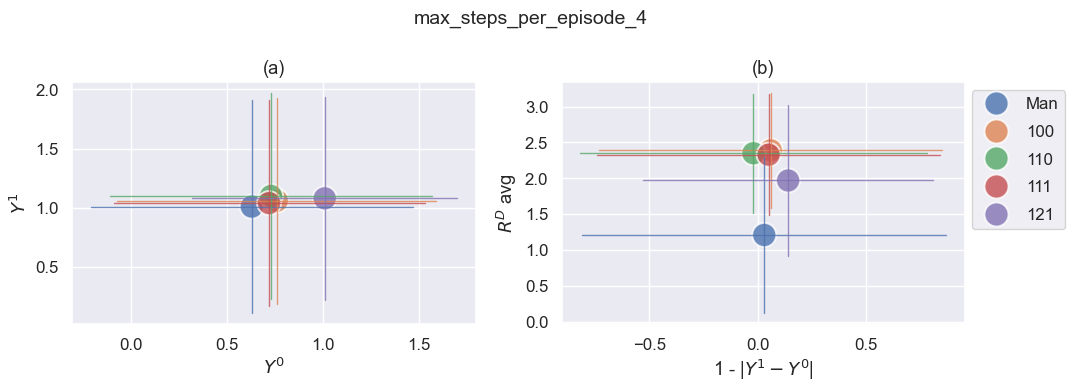

,Algo,R^C/ep,R^Q/ep,R^F/ep,R^C/ep std,R^Q/ep std,R^F/ep std,R^C/ep p05,R^Q/ep p05,R^F/ep p05,R^C/ep p95,R^Q/ep p95,R^F/ep p95,Y0 AVG,Y1 AVG,Y0 AVG p05,Y1 AVG p05,Y0 AVG p95,Y1 AVG p95,Y0 std,Y1 std,Y0 FINAL,Y1 FINAL,Y0 FINAL std,Y1 FINAL std,Y0 FINAL p05,Y1 FINAL p05,Y0 FINAL p95,Y1 FINAL p95,|Y1-Y0| AVG,|Y1-Y0| std,|Y1-Y0| AVG p05,|Y1-Y0| AVG p95,|Y1-Y0| FINAL,|Y1-Y0| FINAL std,|Y1-Y0| FINAL p05,|Y1-Y0| FINAL p95,Y0 std low,Y0 std high,Y1 std low,Y1 std high,|Y1-Y0| std low,|Y1-Y0| std high,R^C/ep std low,R^C/ep std high
0,Man,1.21,1.18,0.88,1.09,0.88,0.66,0.0,0.0,0.0,3.0,3.0,1.51,0.63,1.01,0.0,0.0,2.0,2.0,0.84,0.90,0.47,1.03,0.76,0.89,0.0,0.0,2.0,2.0,0.97,0.84,0.0,2.0,0.89,0.85,0.0,2.0,-0.21,1.47,0.11,1.91,0.13,1.81,0.12,2.30
1,100,2.39,1.34,0.90,0.80,0.87,0.60,1.0,0.0,0.0,3.0,3.0,1.75,0.76,1.06,0.0,0.0,2.0,2.0,0.83,0.87,0.62,1.10,0.76,0.86,0.0,0.0,2.0,2.0,0.94,0.79,0.0,2.0,0.91,0.77,0.0,2.0,-0.07,1.59,0.19,1.93,0.15,1.73,1.59,3.19
2,110,2.35,1.35,0.84,0.83,0.84,0.62,1.0,0.0,0.0,3.0,3.0,1.75,0.73,1.10,0.0,0.0,2.0,2.0,0.84,0.87,0.58,1.15,0.77,0.85,0.0,0.0,2.0,2.0,1.02,0.80,0.0,2.0,0.98,0.79,0.0,2.0,-0.11,1.57,0.23,1.97,0.22,1.82,1.52,3.18
3,111,2.33,1.29,0.90,0.84,0.85,0.60,1.0,0.0,0.0,3.0,3.0,1.75,0.72,1.04,0.0,0.0,2.0,2.0,0.81,0.87,0.56,1.09,0.72,0.86,0.0,0.0,2.0,2.0,0.95,0.79,0.0,2.0,0.89,0.77,0.0,2.0,-0.09,1.53,0.17,1.91,0.16,1.74,1.49,3.17
4,121,1.97,1.56,0.96,1.05,0.82,0.49,0.0,0.0,0.0,3.0,3.0,1.50,1.01,1.08,0.0,0.0,2.0,2.0,0.69,0.86,0.94,1.13,0.64,0.86,0.0,0.0,2.0,2.0,0.86,0.67,0.0,2.0,0.79,0.61,0.0,2.0,0.32,1.70,0.22,1.94,0.19,1.53,0.92,3.02


In [258]:
fig, axes, results_agg = plot_results(results, title=EXPERIMENT_NAME)
display(results_agg)